# Examples: GeoPandas Overlay Operations
Spatial overlays allow you to compare two GeoDataFrames containing polygon or multipolygon geometries and create a new GeoDataFrame with the new geometries representing the spatial combination *and* merged properties. This allows you to answer questions like

> What are the demographics of the census tracts within 1000 ft of the highway?

The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the dataframe level, not on individual geometries, and the properties from both are retained

-------------------------------------------------------
*From https://github.com/geopandas/geopandas/blob/master/examples/overlays.ipynb. Re-ran and tweaked by [Emilio Mayorga](https://github.com/emiliom), 12/10/2015, on my geopandas conda environment.*

In [1]:
from IPython.core.display import Image 
Image(url="http://docs.qgis.org/testing/en/_images/overlay_operations.png")

Now we can load up two GeoDataFrames containing (multi)polygon geometries...

Downloaded sample NYC Boroughs shape file from http://www.nyc.gov/html/dcp/download/bytes/nybb_14aav.zip

In [2]:
%matplotlib inline
import os
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

# NYC Boros
#zippath = os.path.abspath('../examples/nybb_14aav.zip')
zippath = os.path.abspath('/home/mayorga/Desktop/MySciPythonApps/nybb_14aav.zip')
polydf = read_file('/nybb_14a_av/nybb.shp', vfs='zip://' + zippath)

# Generate some circles
b = [int(x) for x in polydf.total_bounds]
N = 10
polydf2 = GeoDataFrame([
    {'geometry' : Point(x, y).buffer(10000), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2]-b[0])/N)),
                    range(b[1], b[3], int((b[3]-b[1])/N)))])

The first dataframe contains multipolygons of the NYC boros

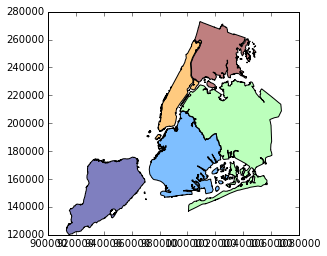

In [3]:
polydf.plot();

And the second GeoDataFrame is a randomly generated set of circles in the same geographic space (TODO ...use real data)

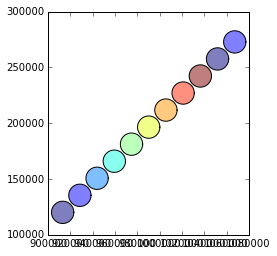

In [4]:
polydf2.plot();

The `geopandas.tools.overlay` function takes three arguments:

* df1
* df2
* how

Where `how` can be one of:

    ['intersection',
    'union',
    'identity',
    'symmetric_difference',
    'difference']

So let's identify the areas (and attributes) where both dataframes intersect using the `overlay` tool. 

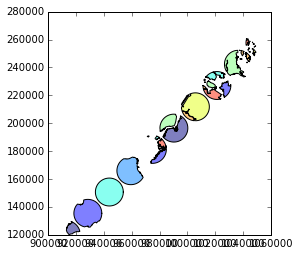

In [5]:
newdf = overlay(polydf, polydf2, how="intersection")
newdf.plot();

And take a look at the attributes; we see that the attributes from both of the original GeoDataFrames are retained. 

In [6]:
polydf.head()

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623847e+09,330454.175933,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,1.937810e+09,741227.337073,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,3.045079e+09,896875.396449,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,6.364308e+08,358400.912836,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,1.186822e+09,464475.145651,(POLYGON ((1012821.805786133 229228.2645874023...


In [7]:
polydf2.head()

,geometry,value1,value2
0,"POLYGON ((923175 120121, 923126.847266722 1191...",1033296,793054
1,"POLYGON ((938595 135393, 938546.847266722 1344...",1063988,793202
2,"POLYGON ((954015 150665, 953966.847266722 1496...",1094680,793350
3,"POLYGON ((969435 165937, 969386.847266722 1649...",1125372,793498
4,"POLYGON ((984855 181209, 984806.847266722 1802...",1156064,793646


In [8]:
newdf.head()

,BoroCode,BoroName,Shape_Area,Shape_Leng,value1,value2,geometry
0,5,Staten Island,1.623847e+09,330454.175933,1033296,793054,"POLYGON ((916755.4256330276 129447.9617643995,..."
1,5,Staten Island,1.623847e+09,330454.175933,1063988,793202,"POLYGON ((938595 135393, 938546.847266722 1344..."
2,5,Staten Island,1.623847e+09,330454.175933,1125372,793498,"POLYGON ((961436.3049926758 175473.0296020508,..."
3,5,Staten Island,1.623847e+09,330454.175933,1094680,793350,"POLYGON ((954015 150665, 953966.847266722 1496..."
4,2,Bronx,1.186822e+09,464475.145651,1309524,794386,"POLYGON ((1043287.193237305 260300.0289916992,..."


Now let's look at the other `how` operations:

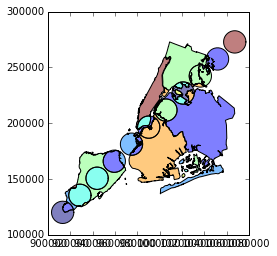

In [9]:
newdf = overlay(polydf, polydf2, how="union")
newdf.plot();

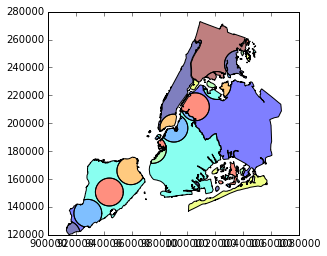

In [10]:
newdf = overlay(polydf, polydf2, how="identity")
newdf.plot();

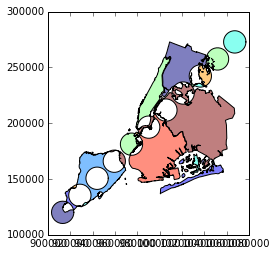

In [11]:
newdf = overlay(polydf, polydf2, how="symmetric_difference")
newdf.plot();

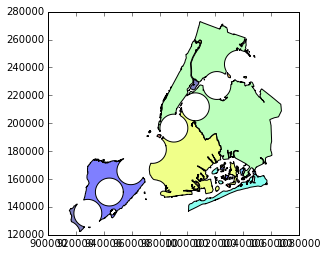

In [12]:
newdf = overlay(polydf, polydf2, how="difference")
newdf.plot();